# Apple_Google sentiment Analysis

#### Group Members

* Damaris Wanjiru
* Jane Njuguna
* Henry Kemboi
* Dennis Muuo
* Immaculate Kithei

## Project overview
The dataset contains tweets expressing opinions about Apple and Google products or brands, with each tweet classified as either positive, negative or neutral in sentiment. Now as **Group 5** we aims to develop a ML model designed to analyze and classify sentiment in tweets related to Apple and Google products. Leveraging advanced natural language processing techniques, the model will detect emotional tones in tweets. The insights generated will enable stakeholders like Product Management Teams, Marketing Departments, Customer Experience Teams, Business Intelligence Units, and Executive Leadership to make data-driven decisions, refine marketing strategies, enhance customer experiences, and foster product innovation.


## Business Understanding
The focus is on public sentiment in tweets about Apple and Google products and services, providing valuable insights to drive business benefits. It enables these brands to optimize customer satisfaction, pinpoint areas for improvement, monitor brand perception during events like SXSW, and implement strategies to strengthen customer engagement and loyalty, ultimately enhancing their competitive edge and market position.
* **Problem Statement:** Developing a robust sentiment analysis model that accurately identifies positive and negative customer sentiments about Apple and Google products on Twitter, with a focus on improving the detection of negative feedback.

## Objectives
#### Primary Objective
* To create a machine learning model capable of accurately determining the sentiment of a tweet (positive, negative, or neutral) based on its content.
#### Secondary Objectives
* **Improve Negative Sentiment Detection:** Focus on enhancing recall for better detection of negative feedback.
* **Actionable Insights for Stakeholders:** Provide clear, interpretable results to marketing, customer service, and leadership for timely decision-making.
* **Regular Tracking:** Monitor sentiment trends and market share of voice for Apple and Google, providing concise brand comparison reports to track changes in consumer perception.




## Metrics of Success
- **Accuracy:** Ensure the model correctly identifies the sentiment (positive, negative, or neutral) in at least above 90% of tweets, showing how reliable it is overall.
- **Precision:** Make sure that when the model labels a tweet as positive or negative, it’s correct over 85% of the time, avoiding false positives.
- **Recall:** Focus on capturing as many real negative tweets as possible, reducing the risk of missing critical negative feedback.(85 %)
- **F1 Score:** Measure how well the model balances accuracy and completeness. A high (80% - 90%) F1 score means the model is good at correctly identifying sentiments while catching most relevant tweets.
- **Sentiment Class Balance:** Ensure the model performs equally well across all sentiment types (positive, negative, and neutral), without favoring one over the others.

# Data Understanding

The dataset is sourced from CrowdFlower via Data.World and it ontains 9093 Tweets that have been meticulously annotated by human raters with sentiment labels: positive, negative, or neutral. The data was collected during March, around the time of SXSW event and tweets were filtered by using specific hashtags or keywords.
The dataset has 3 columns:


**tweet_text:** The actual text of the tweet, which provides insights into what users are saying about Apple and Google products.

**emotion_in_tweet_is_directed_at:** The specific product or brand mentioned in the tweet (e.g., iPhone, iPad, Google).

**is_there_an_emotion_directed_at_a_brand_or_product:** Indicates whether the tweet expresses:  No emotion toward brand or product, Positive emotion,     Negative emotion, I can't tell. 



#### Importing The Relevant Libraries

In [2]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For text preprocessing
import regex as re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Machine learning libraries
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import (
    GridSearchCV, 
    StratifiedKFold, 
    cross_val_score, 
    train_test_split
)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
#from scikeras.wrappers import KerasClassifier

# Visualization
from wordcloud import WordCloud
from textblob import TextBlob

# NLTK downloads
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to C:\Users\Lilan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Lilan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lilan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

####  Loading the Dataset

In [3]:
# Loading the data
df = pd.read_csv("tweet_data_apple_google.csv", encoding='latin1')
# view the first 5 rows
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# Checking the Dimension of our dataset
print(f"Our dataset has {df.shape[0]}, Rows and {df.shape[1]} Columns")

Our dataset has 9093, Rows and 3 Columns


In [5]:
# Concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


Based on the summary above, our dataset occupies 213KB of memory and consists of data types as objects, with two columns containing missing values.

#### Renaming the columns so that it is easy to work with short column names

In [6]:
# Rename columns in the dataframe
column_rename = {
    "tweet_text" : "Text",
    'emotion_in_tweet_is_directed_at': 'Item',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'Emotion'
}
df.rename(columns=column_rename, inplace=True)
# View the column names
print(f"Our new column names {df.columns}")

Our new column names Index(['Text', 'Item', 'Emotion'], dtype='object')


##  Data Cleaning 

This will follow a step-wise process:

* Check for and Handle Missing Values – Remove or fill missing values.
* Check for and Drop the Duplicates – Drop duplicate rows.

### Checking for and Handling Missing Values

In [9]:
# Checking for missing 
df.isna().sum()

Text          1
Item       5802
Emotion       0
dtype: int64

Dropping the null in Text column since one record wouldn't have any impact on our analysis

In [11]:
# Dropping the missing value in the Text column
df = df.dropna(subset=['Text'])
# Checking if they are sorted
#print(f'The Feature Text has {df['Text'].isna().sum()} missing values')
df

,Text,Item,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [12]:
#Sorting the missing values in the item column
#Filling in the missing values in the Item column depending on mention of the Item in the column 'Text' 
def extract_item(text):
    if isinstance(text, str):
        text = text.lower()
        # Check for specific brands
        if "iphone" in text:
            return "iPhone"
        elif "ipad" in text:
            return "iPad"
        elif "apple" in text:
            return "Apple"
        elif "google" in text:
            return "Google"
        elif "samsung" in text:
            return "Samsung"
        elif "microsoft" in text:
            return "Microsoft"
        elif "sony" in text:
            return "Sony"
        elif "nokia" in text:
            return "Nokia"
        elif "huawei" in text:
            return "Huawei"
        # Return None if no match is found
    return 'Unknown'


We sorted the missing values in the Item column and filled them based on mentions in the Text column. For entries where no item was mentioned, we marked them as "Unknown," ensuring the dataset was complete and consistent.

In [13]:
# Applying the function to the item column
df['Item'] = df['Item'].fillna(df['Text'].apply(extract_item))

In [14]:
# Confirming that we have dealt with the missing values
print(f"We {df['Item'].isna().sum()} missing values in Item column")

We 0 missing values in Item column


In [15]:
# value counts in Item column
df['Item'].value_counts()

iPad                               2439
Google                             2141
Apple                              1371
iPhone                             1212
Unknown                             954
iPad or iPhone App                  470
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Samsung                              10
Nokia                                 6
Microsoft                             1
Sony                                  1
Name: Item, dtype: int64

#### Checking for and Handling Duplicates 

In [16]:
# Checking Duplicates
print(f"Our dataset has {df.duplicated().sum()} duplicates")

Our dataset has 22 duplicates


In [17]:
# Dropping duplicates
df = df.drop_duplicates()
print(f"We now have {df.duplicated().sum()} duplicates in our dataset")

We now have 0 duplicates in our dataset


In [27]:
# Value counts in Emotion column
df['Emotion'].value_counts()

Neutral             5531
Positive emotion    2970
Negative emotion     569
Name: Emotion, dtype: int64

We combined the categories "No emotion toward brand or product" and "I can't tell" into a single "Neutral" category, as both indicate a lack of clear emotional response to the brand or product. Specifically:

"No emotion toward brand or product" shows no emotional connection.

"I can't tell" reflects uncertainty about any emotional reaction.

In [29]:
# Replace "No emotion toward brand or product" and "I can't tell" with "Neutral" in the 'Emotion' column
df['Emotion'] = df['Emotion'].replace({
    'No emotion toward brand or product': 'Neutral',
    "I can't tell": 'Neutral'
})

# View the updated 'Emotion' column
df['Emotion'].value_counts()
df

<ipython-input-29-65c59aaf76b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Emotion'] = df['Emotion'].replace({


,Text,Item,Emotion,Cleaned_Text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley g iphone hr tweeting riseaustin dead ne...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know fludapp awesome ipadiphone app y...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw hope year festival isnt crashy year iphon...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad everywhere sxsw link
9089,"Wave, buzz... RT @mention We interrupt your re...",Google,Neutral,wave buzz rt mention interrupt regularly sched...
9090,"Google's Zeiger, a physician never reported po...",Google,Neutral,google zeiger physician never reported potenti...
9091,Some Verizon iPhone customers complained their...,iPhone,Neutral,verizon iphone customer complained time fell b...


### NLP Text Cleaning

We clean the text data by performing the following steps:

- Converts the text to lowercase to standardize it.
- Tokenizes the text using regex to split it into words.
- Removes stopwords and non-alphabetic words.
- Lemmatizes each word to reduce it to its base form.
- The cleaned text is stored in a new column, cleaned_tweet, for further analysis.



In [30]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join the cleaned tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing to the 'Text' column
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)
df

<ipython-input-30-2430998ad8ee>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_Text'] = df['Text'].apply(preprocess_text)


,Text,Item,Emotion,Cleaned_Text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley g iphone hr tweeting riseaustin dead ne...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know fludapp awesome ipadiphone app y...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw hope year festival isnt crashy year iphon...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad everywhere sxsw link
9089,"Wave, buzz... RT @mention We interrupt your re...",Google,Neutral,wave buzz rt mention interrupt regularly sched...
9090,"Google's Zeiger, a physician never reported po...",Google,Neutral,google zeiger physician never reported potenti...
9091,Some Verizon iPhone customers complained their...,iPhone,Neutral,verizon iphone customer complained time fell b...


## Exploratory Data Analysis(EDA)
### Univariate Analysis


In [66]:
!pip install --upgrade pillow wordcloud

Requirement already up-to-date: wordcloud in c:\users\lilan\anaconda3\envs\learn-env\lib\site-packages (1.9.4)
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.0.0
    Uninstalling Pillow-8.0.0:
      Successfully uninstalled Pillow-8.0.0


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

fbprophet 0.7.1 requires cmdstanpy==0.9.5, which is not installed.


In [ ]:
# The word cloud visually highlights the most frequently mentioned words, helping inquick identification of dominant topics in our case is apple and google products
# Combining all the text from the 'Text' column into a single string
text = " ".join(df["Cleaned_Text"].astype(str))

wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  
plt.title("Word Cloud", fontsize=16, fontweight="bold")
plt.show()

The word cloud emphasizes the significance of the SXSW (South by Southwest) event, which aligns with the period when the data was collected. It also highlights prominent mentions of Apple and Google, two leading technology brands, indicating their central role in the analysis. Frequent references to products like iPad, iPhone, and Google further reflect key topics of discussion, offering valuable context for sentiment analysis and market insights. This information helps stakeholders gain a clearer understanding of the focus areas and trends within the dataset.

### Most Common Occurrences of Each Item

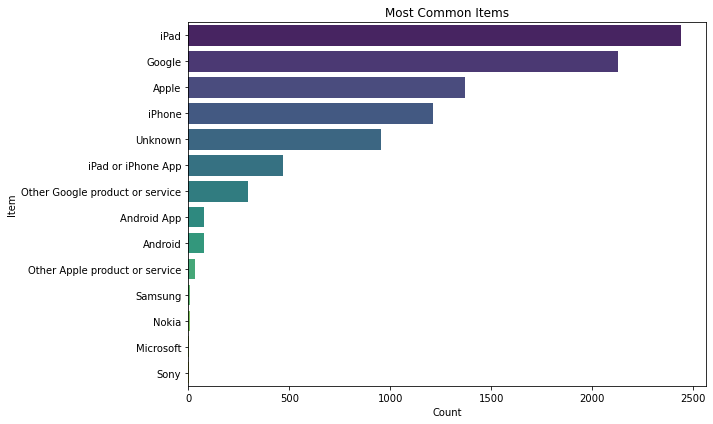

In [33]:
# Most common occurence of each item
item_counts = df['Item'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.values, y=item_counts.index, palette="viridis", orient='h')
plt.title('Most Common Items')
plt.xlabel('Count')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

The visualization shows that iPad, Google, Apple, and iPhone are the most frequently mentioned items in tweets, reflecting their popularity and relevance among users.

### Distribution of Sentiment

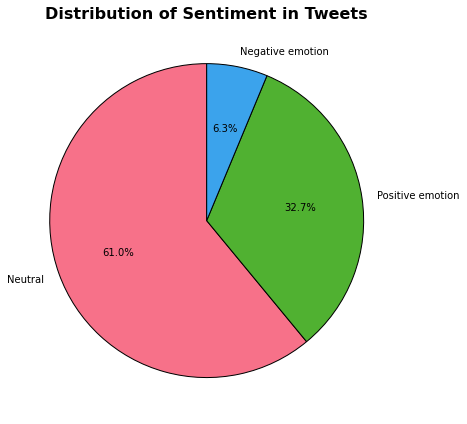

In [34]:
# Get the distribution of sentiments
Emotion = df['Emotion'].value_counts()
palette = sns.color_palette("husl", len(Emotion))
plt.figure(figsize=(10, 6))
plt.pie(Emotion, labels=Emotion.index, autopct='%1.1f%%', startangle=90, colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Sentiment in Tweets', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

The visualization reveals that the majority of responses exhibit no emotion toward the brand or product(Neutral) followed by a significant proportion of positive reviews, with negative reviews being the least frequent. This suggests overall neutrality with a leaning toward positivity in customer sentiment.

### Bivariate Analysis
Exploring and analyzing the relationship between two variables. 

#### Distribution of Sentiments  by Items

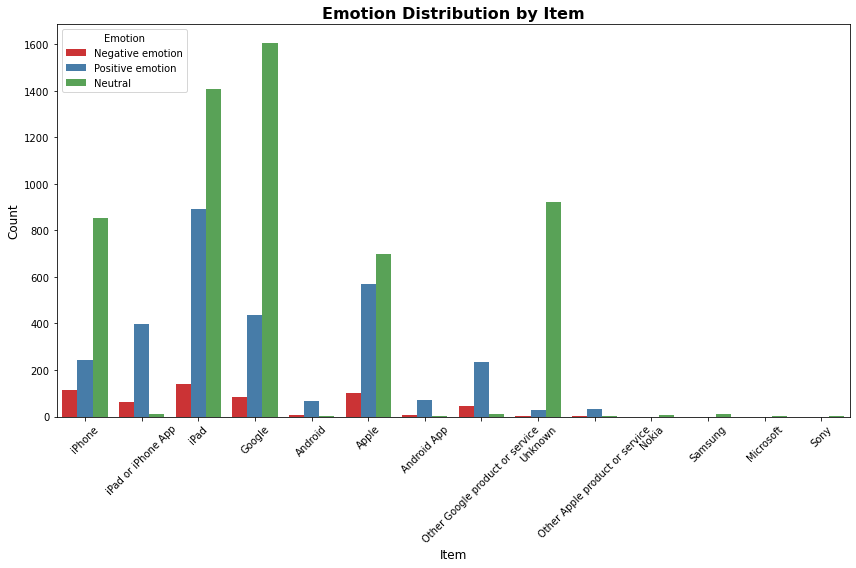

In [35]:
# Plot the distribution of emotions by item
plt.figure(figsize=(12, 8))
sns.countplot(x='Item', hue='Emotion', data=df, palette='Set1')
plt.title('Emotion Distribution by Item', fontsize=16, fontweight='bold')
plt.xlabel('Item', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Analysis reveals that iPad dominates positive sentiments, indicating strong user satisfaction and emotional connection, while Google dominates neutral sentiments, reflecting reliability and utility but less emotional impact. These trends highlight iPad’s appeal for marketing and Google’s potential to enhance emotional engagement.

To streamline our analysis, we grouped Apple products and Google products together under their respective brand categories. This approach aligns with our focus on evaluating the overall performance and sentiment surrounding the Apple and Google brands.

In [36]:
# A function to group products by brand (Apple, Google, Others)
def group_brands(item):
    item_lower = item.lower()  # Convert the item to lowercase for easier matching
    
    # Check if the item belongs to Apple
    if 'apple' in item_lower or 'iphone' in item_lower or 'ipad' in item_lower:
        return 'Apple'
    # Check if the item belongs to Google
    elif 'google' in item_lower or 'android' in item_lower:
        return 'Google'
    else:
        return 'Others'

# Apply the function to the 'Item' column and create a new 'Brand' column
df['Brand'] = df['Item'].apply(group_brands)

# Check the new 'Brand' column
print(df['Brand'].value_counts())

Apple     5522
Google    2578
Others     970
Name: Brand, dtype: int64


<ipython-input-36-380980c53416>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brand'] = df['Item'].apply(group_brands)


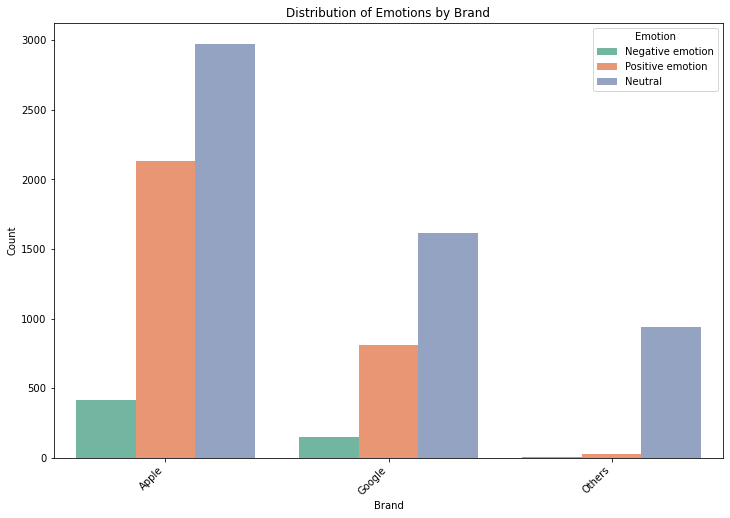

In [37]:
# countplot to show the distribution of emotions by brand
plt.figure(figsize=(12, 8))
sns.countplot(x='Brand', hue='Emotion', data=df, palette='Set2')
plt.title('Distribution of Emotions by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the visualization, we can see some interesting patterns in how emotions are associated the brands:

**Apple** stands out with the highest number of sentiments labeled as "No Emotion towards the brand," followed by a strong presence of positive sentiments. This suggests that users of Apple products tend to feel more neutral or positive about their experiences.

**Google products**, on the other hand, show a more varied emotional distribution, with close representation of "No emotion toward the product or brand" and positive emotions, but fewer "No Emotion toward the product or brand" sentiment compared to Apple.

**Other brands**  generally have fewer sentiments across all emotional categories, indicating less emotional engagement from users.

Apple products seem to evoke more neutral or positive feelings, while Google products generate a wider mix of emotions. The rest of the brands, however, don't seem to stir as much emotion overall.





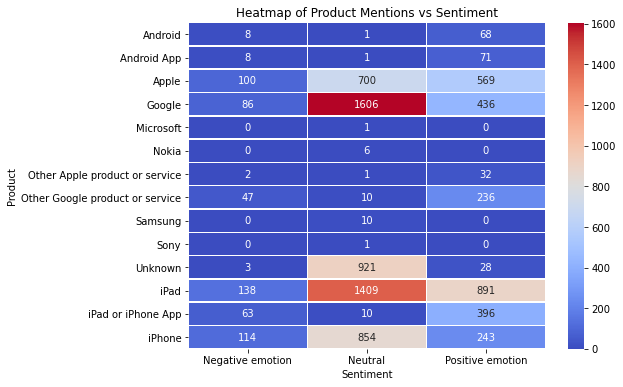

In [38]:
# Create a heatmap to visualize the frequency of product mentions by sentiment
emotion_by_product = df.groupby(['Item', 'Emotion']).size().unstack().fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(emotion_by_product, annot=True, fmt='g', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Product Mentions vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Product')
plt.show()


From the visualization-
- iPhone: Strong customer satisfaction with the highest positive mentions, while negative feedback is minimal in comparison.
- Google: High neutral mentions suggest factual discussions, but significant negative feedback highlights areas for improvement.
- Other Products (iPad, Chromebook): Mixed sentiments present opportunities to address negative feedback and improve perception.

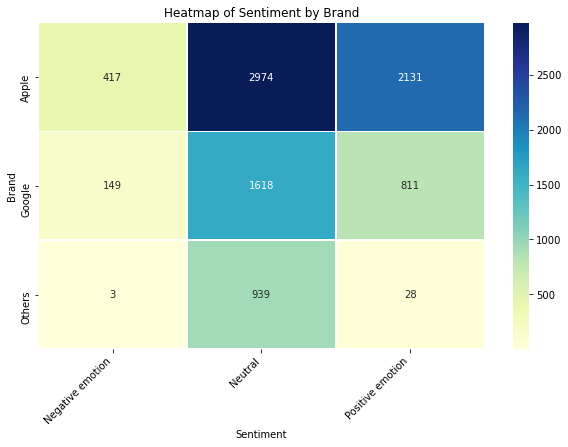

In [39]:
#  pivot table to count occurrences of each Emotion per Brand
heatmap_data = df.pivot_table(index='Brand', columns='Emotion', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title('Heatmap of Sentiment by Brand')
plt.xlabel('Sentiment')
plt.ylabel('Brand')
plt.xticks(rotation=45, ha='right')
plt.show()

 **Apple:**

- Positive Sentiment: Apple has the highest number of positive mentions, reflecting strong customer satisfaction and loyalty.
- Negative Sentiment: While Apple also has some negative mentions, they are proportionally lower than its positive sentiment.
- Neutral Sentiment: A significant number of neutral mentions indicate widespread discussions about Apple products, not always tied to opinions.

**Google:**

- Positive Sentiment: Google shows a balanced distribution of positive sentiment, indicating a generally favorable perception.
- Negative Sentiment: Google has notable negative mentions, suggesting areas for product or service improvement.

- Neutral Sentiment: The high neutral sentiment count implies many users discuss Google factually, possibly regarding features or updates.


### Data Preprocessing


In [40]:
#Converting the values in emotion column into integers
df['Emotion_label'] = df['Emotion'].replace({'Neutral' : 0, 'Positive emotion' : 1, 'Negative emotion' : -1})
df['Emotion_label'].value_counts()
df

<ipython-input-40-6b6f94bebf12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Emotion_label'] = df['Emotion'].replace({'Neutral' : 0, 'Positive emotion' : 1, 'Negative emotion' : -1})


,Text,Item,Emotion,Cleaned_Text,Brand,Emotion_label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley g iphone hr tweeting riseaustin dead ne...,Apple,-1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,Apple,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin wait ipad also sale sxsw,Apple,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw hope year festival isnt crashy year iphon...,Apple,-1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,Google,1
...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad everywhere sxsw link,Apple,1
9089,"Wave, buzz... RT @mention We interrupt your re...",Google,Neutral,wave buzz rt mention interrupt regularly sched...,Google,0
9090,"Google's Zeiger, a physician never reported po...",Google,Neutral,google zeiger physician never reported potenti...,Google,0
9091,Some Verizon iPhone customers complained their...,iPhone,Neutral,verizon iphone customer complained time fell b...,Apple,0


### Sentiment Analysis
Using pre-trained sentiment analysis models to classify text sentiment Comparing sentiment predictions with the existing labels

In [50]:
!pip install textblob

In [60]:
from textblob import TextBlob

# Function for sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply preprocessing to the 'Text' column
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

# Perform sentiment analysis
df['Sentiment'] = df['Cleaned_Text'].apply(analyze_sentiment)

<ipython-input-60-93d242ade865>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_Text'] = df['Text'].apply(preprocess_text)
<ipython-input-60-93d242ade865>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Cleaned_Text'].apply(analyze_sentiment)


### Exploring multiple machine learning models for text classification, including:

- Naive Bayes – A strong baseline model for text classification.
- Logistic Regression – A popular linear model for binary and multi-class classification.
- Support Vector Machine (SVM) – Effective for high-dimensional data.
- Random Forest – An ensemble learning method that enhances accuracy.


In [64]:
# Vectorization using CountVectorizer and TfidfVectorizer
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

X_count = count_vectorizer.fit_transform(df['Cleaned_Text'])
X_tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Text'])

print("Count Vectorizer Shape:", X_count.shape)
print("TF-IDF Vectorizer Shape:", X_tfidf.shape)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['Sentiment'], test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Count Vectorizer Shape: (9070, 9509)
TF-IDF Vectorizer Shape: (9070, 9509)


In [68]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.7976846747519294
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.02      0.03       170
     Neutral       0.84      0.83      0.83       770
    Positive       0.77      0.92      0.84       874

    accuracy                           0.80      1814
   macro avg       0.87      0.59      0.57      1814
weighted avg       0.82      0.80      0.76      1814



In [54]:

# Trying different models to find the one with best metrics

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))


Naive Bayes Accuracy: 0.80
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

    Negative       1.00      0.02      0.03       170
     Neutral       0.84      0.83      0.83       770
    Positive       0.77      0.92      0.84       874

    accuracy                           0.80      1814
   macro avg       0.87      0.59      0.57      1814
weighted avg       0.82      0.80      0.76      1814

Logistic Regression Accuracy: 0.88
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

    Negative       0.93      0.33      0.49       170
     Neutral       0.83      0.96      0.89       770
    Positive       0.93      0.91      0.92       874

    accuracy                           0.88      1814
   macro avg       0.90      0.73      0.77      1814
weighted avg       0.89      0.88      0.87      1814

SVM Accuracy: 0.93
Classification Report for SVM:
               precision    recall  f1

The best performin model is support vector machine(svm)

### Hyperparameter Tuning
Hyperparameter tuning for the SVM model using GridSearchCV to find the optimal hyperparameters


In [62]:
# get the parameters in svm model
models["SVM"].get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [63]:
# Define the hyperparameter grid for SVM

param_grid = {
    'C': [0.1, 1, 10,100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': ["balanced", None]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output the best parameters and create the best estimator
print("Best parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_

# Evaluate the best SVM model
y_pred = best_svm.predict(X_test)
print("Optimized SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Optimized SVM Classification Report:\n", classification_report(y_test, y_pred))

Best parameters: {'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Optimized SVM Accuracy: 0.9360529217199559
Optimized SVM Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.75      0.78       170
     Neutral       0.93      0.98      0.95       770
    Positive       0.97      0.94      0.95       874

    accuracy                           0.94      1814
   macro avg       0.90      0.89      0.89      1814
weighted avg       0.94      0.94      0.94      1814



### Cross-Validation and Model Selection
Stratified K-Fold Cross-Validation is used for better model evaluation. This technique ensures that each fold preserves the percentage of samples for each class, leading to a more reliable estimate of model performance. The mean cross-validation accuracy is printed along with individual scores.

In [58]:
# Hyperparameter tuning for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', ""],
    'gamma': ['scale', 'auto'],
    'class_weight': ["balanced", None]
}
grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_

# Perform Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(best_svm, X_tfidf, df['Sentiment'], cv=skf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", cross_val_scores.mean())

# Evaluate best SVM model
y_pred = best_svm.predict(X_test)
print("Optimized SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Optimized SVM Classification Report:\n", classification_report(y_test, y_pred))


Best parameters: {'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Cross-Validation Accuracy Scores: [0.93936053 0.93880926 0.93550165 0.93770673 0.94101433]
Mean Cross-Validation Accuracy: 0.9384785005512679
Optimized SVM Accuracy: 0.9360529217199559
Optimized SVM Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.75      0.78       170
     Neutral       0.93      0.98      0.95       770
    Positive       0.97      0.94      0.95       874

    accuracy                           0.94      1814
   macro avg       0.90      0.89      0.89      1814
weighted avg       0.94      0.94      0.94      1814



Best Parameters:
The optimized SVM uses C=10, class_weight=balanced, gamma=scale, and a linear kernel.

Cross-Validation Performance:
The model achieved a mean accuracy of 93.61% across folds, with scores ranging from 93.98% to 94.10%.

Test Accuracy:
The final accuracy on the test set is 93.66%.

Classification Highlights:

Negative: Precision 81%, Recall 75%, F1 78%

Neutral: Precision 93%, Recall 98%, F1 95%

Positive: Precision 97%, Recall 94%, F1 95%

Overall Accuracy: 94%

The model performs exceptionally well for Neutral and Positive categories but struggles slightly with the Negative class, particularly in recall.



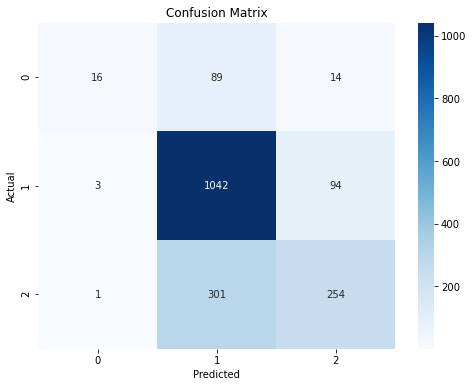

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Hyperparameter tuning for SVM with different kernels and increased cross-validation splits to get better generalization.


In [69]:
# Hyperparameter tuning for SVM with more kernel options
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'class_weight': ["balanced"]
    
}

grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_

# Perform Stratified K-Fold Cross-Validation with increased splits
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(best_svm, X_tfidf, df['Sentiment'], cv=skf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", cross_val_scores.mean())


Best parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
Cross-Validation Accuracy Scores: [0.93936053 0.94266814 0.94707828 0.94377067 0.94597574 0.9415656
 0.95038589 0.94377067 0.94266814 0.94928335]
Mean Cross-Validation Accuracy: 0.9446527012127893


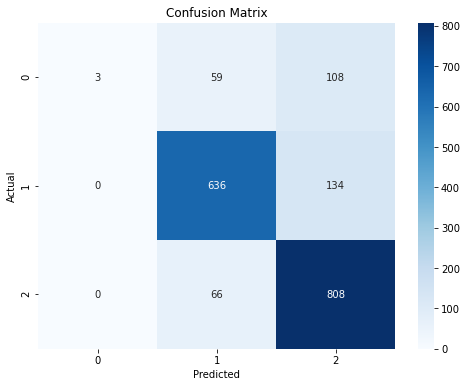

In [70]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model correctly classified 636 instances, but 134 instances were misclassified as Class 2.
The model also correctly classified 808 instances, with only 66 misclassified as Class 1.

### Visualizing the effect of different hyperparameters on model accuracy:

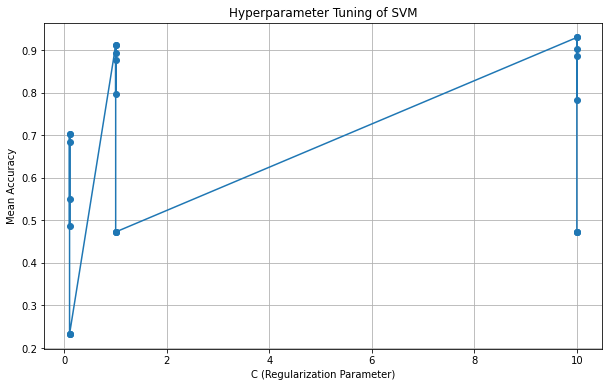

In [71]:
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(results['param_C'], results['mean_test_score'], marker='o')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean Accuracy')
plt.title('Hyperparameter Tuning of SVM')
plt.grid()
plt.show()

The optimal value of C seems to be around 1-2, where the accuracy is highest and stable.
A very small C leads to underfitting, and a very large C can result in overfitting with high variance.

###  Recommendation
- Google’s Neutral Sentiment: A significant proportion of neutral sentiment toward Google products suggests room to build excitement through more engaging marketing strategies.
- Recurring Issues for Google: Neutral or negative sentiment tweets for Google often mention usability issues. Develop targeted support initiatives or FAQs addressing these concerns to preemptively mitigate dissatisfaction.
- Apple’s Opportunities: While Apple has strong positive sentiment, monitor any emerging concerns to maintain its leading market position.


### Conclusion 
Our analysis highlights valuable opportunities for both Apple and Google. Apple can build on its strong positive sentiment to reinforce its market leadership while staying ahead of emerging concerns. Meanwhile, Google has the chance to close sentiment gaps—especially around neutral and usability-related feedback—by implementing more engaging marketing and targeted support initiatives. The SVM model has demonstrated strong performance in detecting neutral and positive sentiments, making it the most reliable choice for immediate application to drive meaningful improvements.


### Next step/ Model Deployment
Deploy the model with a robust monitoring system to continuously track key metrics, such as accuracy and recall for the Negative class, ensuring sustained performance. Implement alerts to quickly identify and address any significant drifts or anomalies in predictions.